<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/3D_lse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

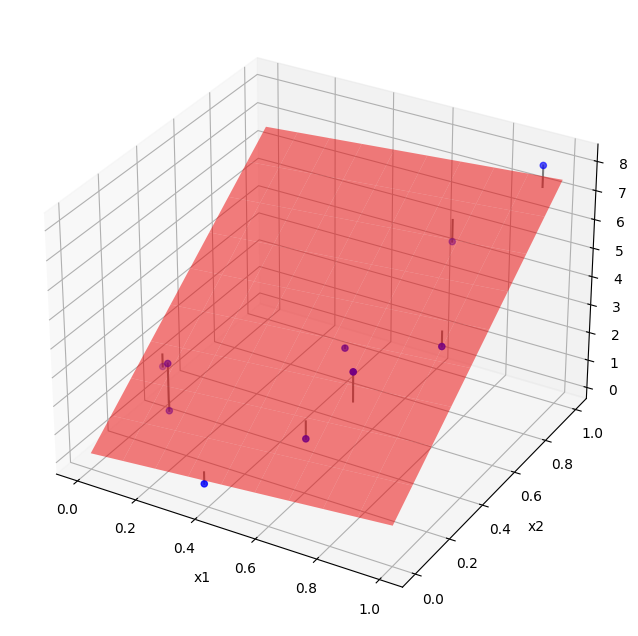

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Step 1: Generate sample data
np.random.seed(42)
x1 = np.random.rand(10)
x2 = np.random.rand(10)
y = 3*x1 + 5*x2 + np.random.randn(10)

# Prepare data for regression
X = np.column_stack((x1, x2))

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Step 3: Calculate residuals
residuals = y - y_pred

# Step 4: Plot the data, regression plane, and residuals
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='blue', label='Data points')

# Create a meshgrid for the regression plane
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
y_grid = model.intercept_ + model.coef_[0]*x1_grid + model.coef_[1]*x2_grid

ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5, label='Regression plane')

# Plot residuals
for i in range(len(x1)):
    ax.plot([x1[i], x1[i]], [x2[i], x2[i]], [y[i], y_pred[i]], color='gray')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

#handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles, labels)

plt.show()






In [42]:
np.set_printoptions(suppress=True)

a=np.column_stack((y, y_pred, (y - y_pred)**2))
a

array([[0.21, 0.62, 0.17],
       [8.02, 7.28, 0.54],
       [5.45, 6.2 , 0.57],
       [1.45, 2.06, 0.38],
       [2.84, 1.48, 1.85],
       [1.16, 1.49, 0.11],
       [1.76, 2.19, 0.19],
       [3.8 , 4.32, 0.27],
       [3.42, 3.49, 0.  ],
       [3.69, 2.66, 1.05]])

In [43]:
np.mean(a[:,2])

0.512261465975708

In [40]:
mse = np.mean((y - y_pred) ** 2)
print("MSE: ", mse)

MSE:  0.512261465975708


In [35]:
r2 = model.score(X, y)
print("R-squared: ", r2)

R-squared:  0.8915910343098388


In [36]:
print("Coefficients: ", model.coef_)

Coefficients:  [0.85 6.5 ]
